<a href="https://colab.research.google.com/github/hager2164/tasks_follow/blob/main/LogisticReg_poly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hageryahya","key":"a3dce5444841c59979e85f72a3e4ae82"}'}

In [2]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
from google.colab import files
files.upload()


Saving ushape.csv to ushape (1).csv


{'ushape (1).csv': b'3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00\n2.115097840005998098e+00,-4.624396793368001912e-02,1.000000000000000000e+00\n8.824897202429525800e-01,-7.575605515192823658e-02,0.000000000000000000e+00\n-5.514410395493309081e-02,-3.733245922211456125e-02,1.000000000000000000e+00\n8.295450281029342898e-01,-5.393214930366995175e-01,1.000000000000000000e+00\n2.112857076342865792e+00,6.620835334836001618e-01,1.000000000000000000e+00\n5.696926997602634879e-01,3.374413575291368428e-01,0.000000000000000000e+00\n9.521745361967547394e-01,-7.530747091382108405e-01,1.000000000000000000e+00\n-2.922114573667314308e-02,3.928733563262766237e-01,1.000000000000000000e+00\n1.715795573379396366e+00,3.606945394211044098e-01,1.000000000000000000e+00\n-2.788301416383404119e-01,6.142053862138131537e-01,1.000000000000000000e+00\n2.003445086685660126e+00,-3.091496039347518821e-01,1.000000000000000000e+00\n1.500096159481413727e+00,-7.463637596324144141e-01,1.00000

In [6]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df= pd.read_csv('ushape.csv')
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [10]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

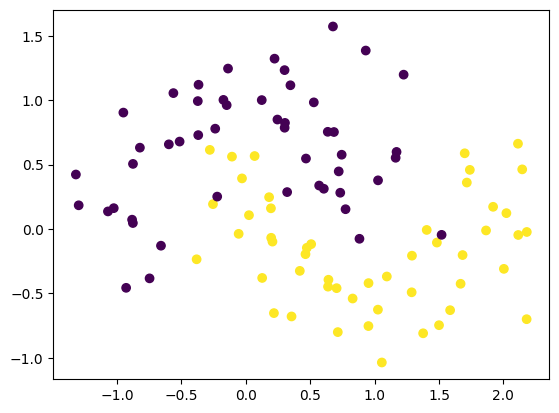

In [11]:
plt.scatter(X[:,0],X[:,1],c=y)


In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

<Axes: >

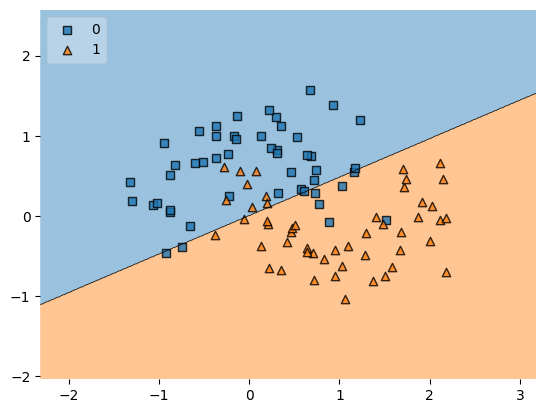

In [13]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf, legend=2)

In [14]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

np.float64(0.8300000000000001)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [16]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

np.float64(0.9099999999999999)

In [20]:
def plot_decision_boundary (X,y, degree =1 ):
  poly = PolynomialFeatures(degree=degree)
  X_trf = poly.fit_transform(X)

  clf  = LogisticRegression()
  clf.fit(X_trf,y)


  accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
  print(accuracy)
  a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
  b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)
  XX ,YY = np.meshgrid (a,b)
  input_array = np.array([XX.ravel(), YY.ravel()]).T

  labels=clf.predict(poly.transform(input_array))



  plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
  plt.scatter(X[:,0],X[:,1], c=y)
  plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))


0.9099999999999999


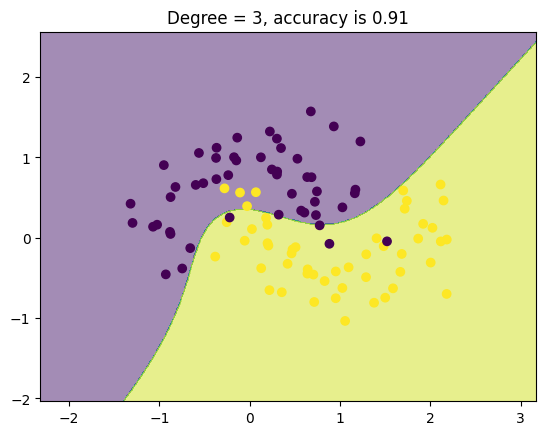

In [21]:
plot_decision_boundary(X,y,degree=3)
